# Analysis of 311 Complaints in Manhattan (2023–2025)

This Jupyter Notebook investigates how the number of complaints related to **HEAT/HOT WATER** and **NOISE** fluctuates throughout the year in the borough of Manhattan.

---

## Research Question

*How does seasonal complaint behavior change in Manhattan – based on HEAT/HOT WATER and NOISE complaints?*

---

## Data Source & Filtering Criteria

The data comes from the official NYC Open Data Portal:
[311 Service Requests from 2010 to Present](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)

The following filters were applied for this analysis:

- **Time period:** Only complaints created between **January 1, 2023 and July 12, 2025** (`Created Date`)
- **Geographic restriction:** Only entries with `Borough = Manhattan`
- **Complaint categories:** Only the following types were considered:
  - `"HEAT/HOT WATER"`
  - `"Noise"`
  - `"Noise - Residential"`

Additionally, only the following fields were retained from the full dataset:
- `Unique Key`, `Created Date`, `Closed Date`, `Status`,
  `Borough`, `Complaint Type`, `Descriptor`, `Longitude`, `Latitude`

This selection reduced the data volume and focused on dimensions relevant to complaint analysis.


## Loading the data

In [47]:
from pathlib import Path
import pandas as pd

# Automatically locate the project root
project_root = Path.cwd()
while project_root.name != "nyc311_project" and project_root != project_root.parent:
    project_root = project_root.parent

# Load CSV file
data_path = project_root / "data" / "311_Manhattan.csv"
df = pd.read_csv(data_path)


## Parse timestamps

In [48]:
# Parse dates using fixed format
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

## Filter and clean columns

In [49]:
# Keep only relevant columns
df = df[['Created Date', 'Complaint Type']]

# Filter for selected complaint types
df = df[df['Complaint Type'].isin(['HEAT/HOT WATER', 'Noise', 'Noise - Residential'])]

## Monthly aggregation

In [50]:
# Extract month from date
df['Month'] = df['Created Date'].dt.to_period('M')

# Group by month and complaint type, then count
counts = df.groupby(['Month', 'Complaint Type']).size().unstack(fill_value=0)

## Group noise-related categories

In [51]:
# Optionally combine different noise complaint types
if 'Noise - Residential' in counts.columns:
    counts['NOISE_TOTAL'] = counts.get('Noise', 0) + counts.get('Noise - Residential', 0)
    counts = counts.drop(columns=['Noise', 'Noise - Residential'])
else:
    counts.rename(columns={'Noise': 'NOISE_TOTAL'}, inplace=True)

## Visualization

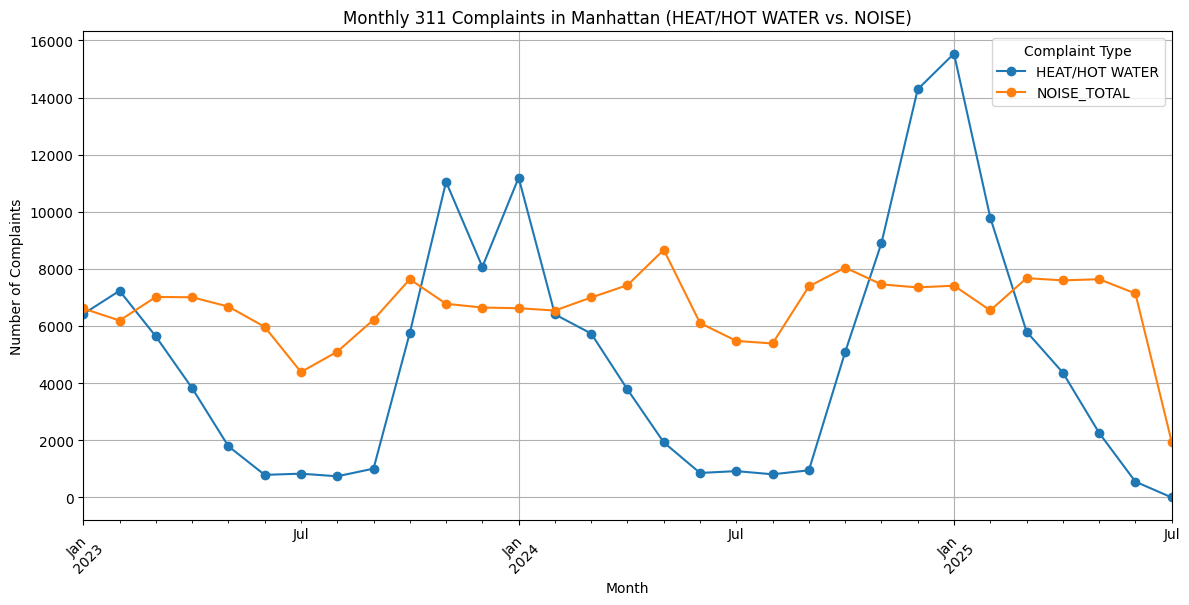

In [52]:
import matplotlib.pyplot as plt

# Plot time series
plt.figure(figsize=(12, 6))
counts.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Monthly 311 Complaints in Manhattan (HEAT/HOT WATER vs. NOISE)')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(title='Complaint Type')
plt.show()